## Download and Clean Dataset
#### Part D

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [127]:
import pandas as pd
import numpy as np

We will be using the dataset provided in the assignment

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

Let's read the dataset into a <em>pandas</em> dataframe.

In [128]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [129]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [130]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [131]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [132]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.
First let us visualize the data.

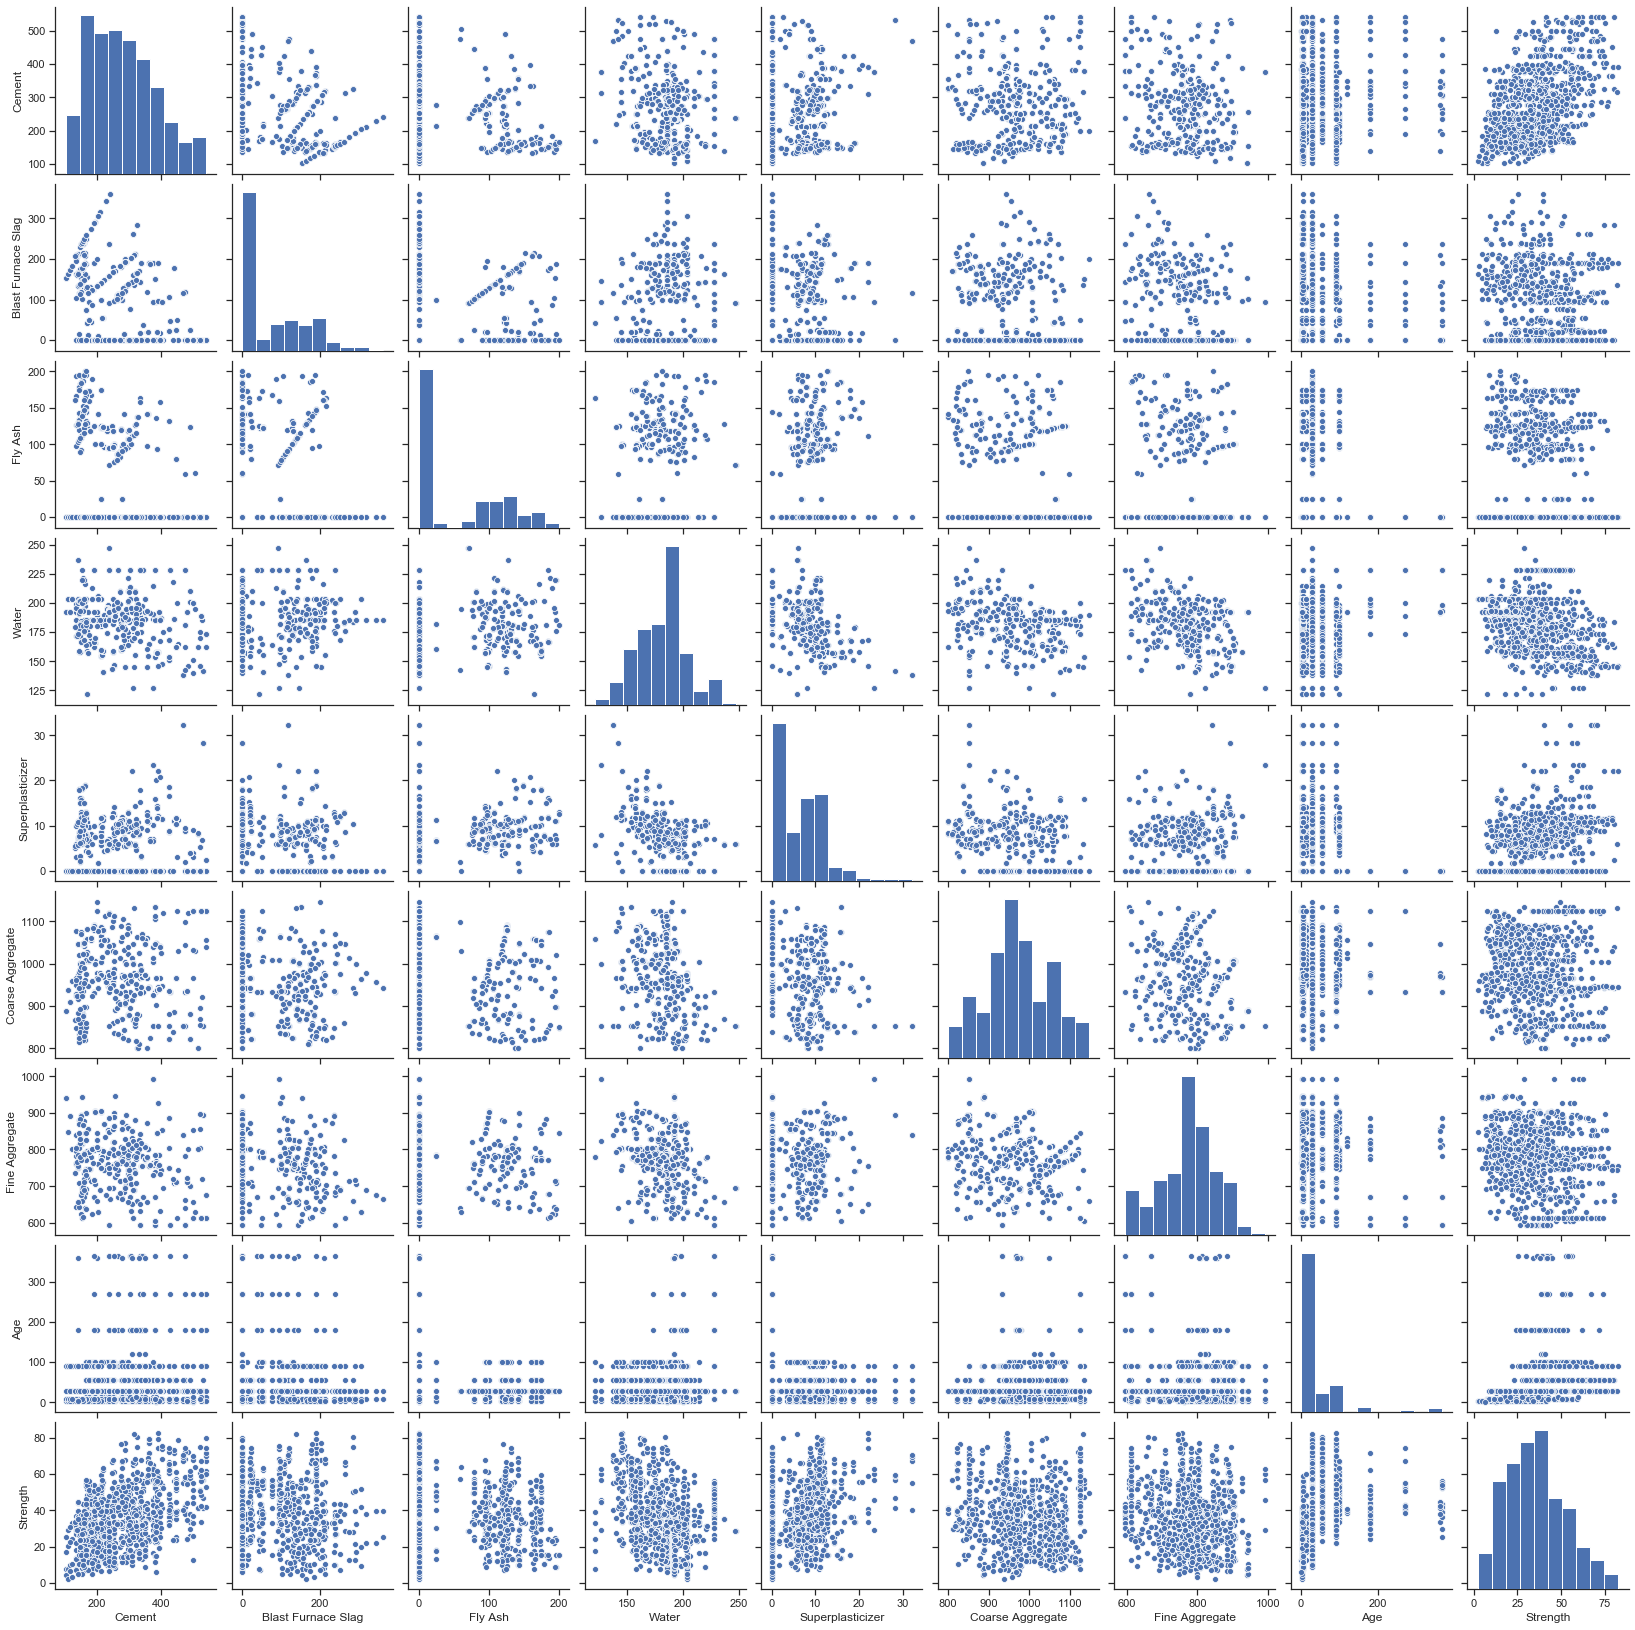

In [133]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(concrete_data)

#### Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [134]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

### Part B
B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

**How does the mean of the mean squared errors compare to that from Step A?**

normalize the data by substracting the mean and dividing by the standard deviation.

In [135]:
predictors = (predictors - predictors.mean()) / predictors.std()
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [136]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [137]:
n_cols = predictors.shape[1] # number of predictors
n_cols

8

<a id="item1"></a>

<a id="item1"></a>

## Import Keras

#### Let's go ahead and import the Keras library

In [138]:
import warnings
warnings.filterwarnings("ignore")
import keras

As you can see, the TensorFlow backend was used to install the Keras library.

Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.

In [139]:
from keras.models import Sequential
from keras.layers import Dense

In [140]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function creates a model that has one hidden layer with 10 neurons and a ReLU activation function. It uses the adam optimizer and the mean squared error as the loss function.

Let's import scikit-learn in order to randomly split the data into a training and test sets

In [141]:
from sklearn.model_selection import train_test_split

Splitting the data into a training and test sets by holding 30% of the data for testing

In [142]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

## Train and Test the Network

Let's call the function now to create our model.

In [143]:
# build the model
model = regression_model()

Next, we will train the model for 50
epochs.


In [144]:
# fit the model
epochs = 100
hist=model.fit(X_train, y_train, epochs=epochs,verbose=1)

Epoch 1/100
721/721 [==============================] - 0s 424us/step - loss: 1556.2955
Epoch 2/100
721/721 [==============================] - 0s 69us/step - loss: 1528.7645
Epoch 3/100
721/721 [==============================] - 0s 65us/step - loss: 1483.6893
Epoch 4/100
721/721 [==============================] - 0s 64us/step - loss: 1408.9969
Epoch 5/100
721/721 [==============================] - 0s 76us/step - loss: 1286.8143
Epoch 6/100
721/721 [==============================] - 0s 107us/step - loss: 1111.0848
Epoch 7/100
721/721 [==============================] - 0s 71us/step - loss: 882.8248
Epoch 8/100
721/721 [==============================] - 0s 82us/step - loss: 632.7077
Epoch 9/100
721/721 [==============================] - 0s 69us/step - loss: 412.4321
Epoch 10/100
721/721 [==============================] - 0s 83us/step - loss: 285.2639
Epoch 11/100
721/721 [==============================] - 0s 55us/step - loss: 234.7252
Epoch 12/100
721/721 [==============================] -

721/721 [==============================] - 0s 69us/step - loss: 59.7689
Epoch 97/100
721/721 [==============================] - 0s 75us/step - loss: 58.6915
Epoch 98/100
721/721 [==============================] - 0s 137us/step - loss: 58.3161
Epoch 99/100
721/721 [==============================] - 0s 184us/step - loss: 58.0479
Epoch 100/100
721/721 [==============================] - 0s 105us/step - loss: 57.6395


In [145]:
Losses=list(hist.history.values())

In [146]:
len(Losses[0])

100

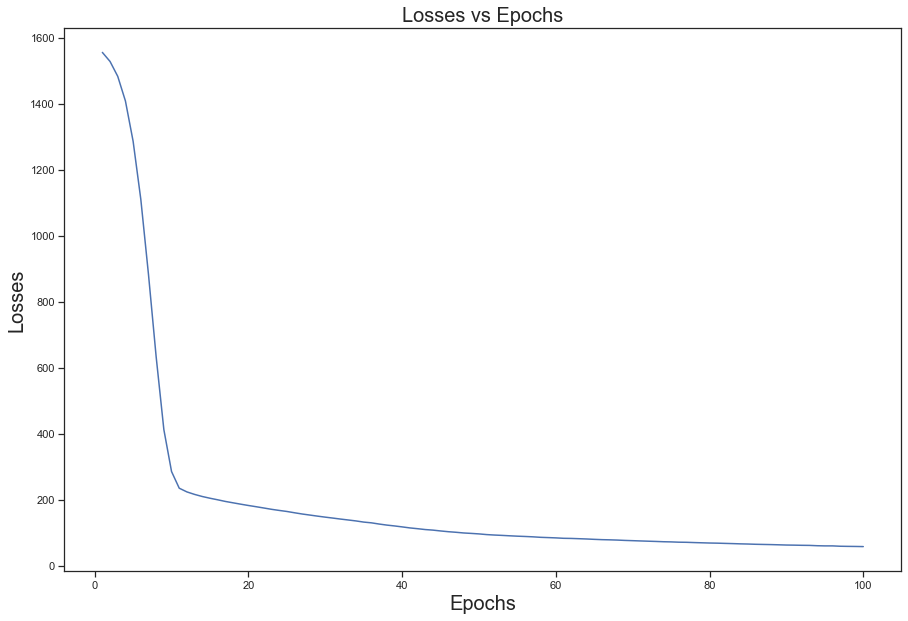

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams.update({'font.size':35})
plt.figure(figsize=(15,10))
plt.plot(list(range(1,len(Losses[0])+1)),Losses[0])
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Losses", fontsize=20)
plt.title("Losses vs Epochs", fontsize=20)
plt.show()

Next we need to evaluate the model on the test data.

In [148]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 1ms/step


56.751971371351324

Now we need to compute the mean squared error between the predicted concrete strength and the actual concrete strength.

Let's import the mean_squared_error function from Scikit-learn.

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
#random sampling
import random
num=50
indices= random.sample(range(len(y_test)),num)
y_test=list(y_test)
y_pred=list(y_pred)
y_test_sam = [y_test[i] for i in indices]
y_pred_sam = [y_pred[i] for i in indices]
y_pred_sam= np.array(y_pred_sam)
y_pred_sam=list(y_pred_sam.reshape(50))

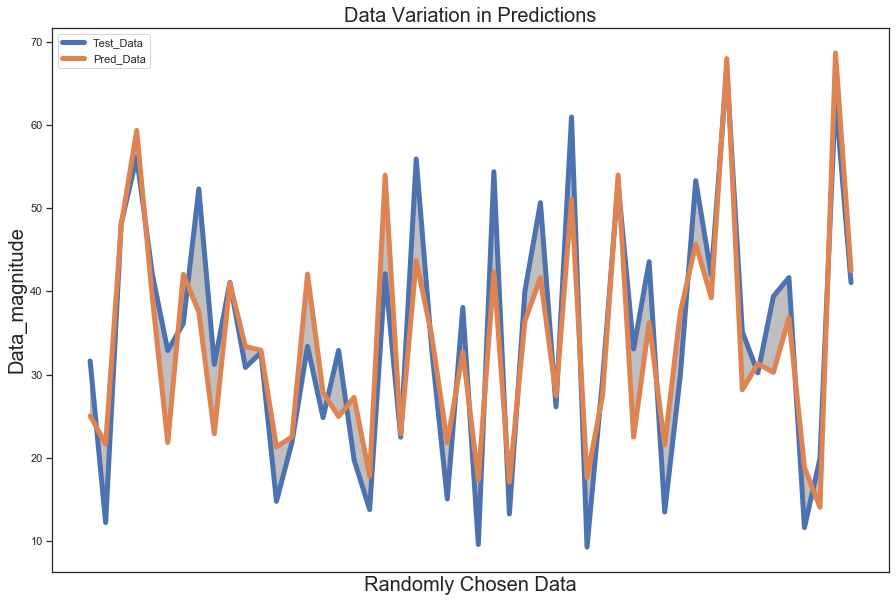

In [151]:
#plotting the differences in the two
plt.figure(figsize=(15,10))
plt.plot(list(range(1,len(y_test_sam)+1)),y_test_sam,label="Test_Data",linewidth=5)
plt.plot(list(range(1,len(y_pred_sam)+1)),y_pred_sam,label="Pred_Data",linewidth=5)
plt.legend()
plt.xlabel("Randomly Chosen Data", fontsize=20)
plt.ylabel("Data_magnitude", fontsize=20)
plt.title("Data Variation in Predictions", fontsize=20)

axes=plt.gca()
x=list(range(1,len(y_test_sam)+1))
plt.fill_between(x,np.array(y_test_sam),np.array(y_pred_sam),color='grey', alpha='0.5')
#axes.set_title('fill between y1 and y2')
#axes.set_xlabel('x')

plt.xticks([])

plt.show()
#good algorithm will minimize the area of the shaded region!

In [152]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

56.75197271216444 0.0


Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.

In [153]:
total_mean_squared_errors = 100
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 39.851927698623015
MSE 2: 39.05044560602182
MSE 3: 30.477725538235266
MSE 4: 31.093197362708427
MSE 5: 29.238640103139538
MSE 6: 30.045331850021018
MSE 7: 32.266488998067416
MSE 8: 23.48005477510224
MSE 9: 27.95819409071049
MSE 10: 23.66059236001814
MSE 11: 23.268370310465496
MSE 12: 19.22937530838556
MSE 13: 24.630143934083215
MSE 14: 26.040207365955734
MSE 15: 23.324277643246944
MSE 16: 17.022694300679326
MSE 17: 20.707048576626576
MSE 18: 21.1639487936273
MSE 19: 20.26497487805808
MSE 20: 20.840475199677797
MSE 21: 19.75348759006142
MSE 22: 20.256221832966727
MSE 23: 19.387180309851193
MSE 24: 20.269336237490755
MSE 25: 19.34072652526658
MSE 26: 21.84338017806266
MSE 27: 17.84418289715418
MSE 28: 17.429465352524446
MSE 29: 25.0454303531585
MSE 30: 19.870492614202902
MSE 31: 17.538547552905037
MSE 32: 17.464035777983927
MSE 33: 18.583703840434744
MSE 34: 18.740951352906457
MSE 35: 24.062094395214686
MSE 36: 21.919415618995245
MSE 37: 17.174559096302414
MSE 38: 20.4535315924092

Mean MSE Report<br>
Comparing between the Means
Part A(Not Normalized,epochs=50): 50.493<br>
Part B(Normalized, epochs=50):    74.109 (model underfitting, more epochs required)<br>
Part C(Normalized, epochs=100):   39.412 (good model) <br>
Part D(Normalized, epochs=100,complex model):   19.758 (more accurate model) <br>

In [154]:
mean_squared_errors.shape

(100,)

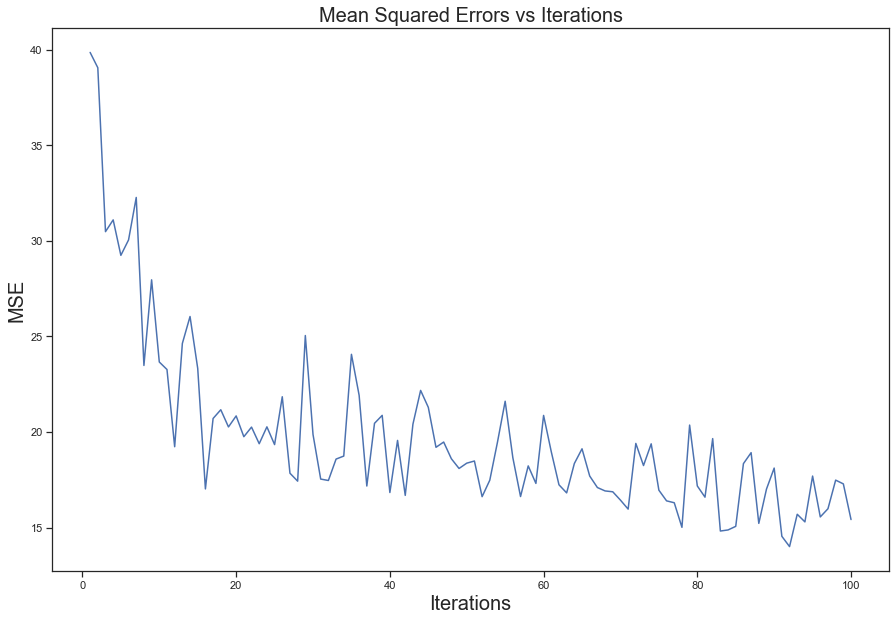

In [155]:

plt.figure(figsize=(15,10))
plt.plot(list(range(1,mean_squared_errors.shape[0]+1)),mean_squared_errors)
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.title("Mean Squared Errors vs Iterations", fontsize=20)
plt.show()